# Домашнее задание по теме: несбалансированные данные (Imbalanced Data)

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install pandas matplotlib numpy seaborn -y

In [8]:
!pip install imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [1]:
import numpy as np

np.__version__

'1.19.2'

In [2]:
import pandas as pd

pd.__version__

'1.1.3'

In [3]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.2'

In [4]:
import seaborn as sns

sns.__version__

'0.11.0'

In [9]:
import imblearn

imblearn.__version__

'0.8.0'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [16]:
# загрузить датасет в pandas dataframe
df = pd.read_csv('hotel_bookings.csv')
# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Анализ графических данных

- Предположим, что модель будет предсказывать результаты колонки `is_repeated_guest`.


- Проанализировать содержание колонки `is_repeated_guest`:
    - Используя график `seaborn.countplot` показать соотношение значений.
    - Вычислить процент соотношения значений (сколько процентов `True` и `False` в этой колонке).
    - Насколько сильно не сбалансирован дата сет?


119390 (is_repeated_guest)


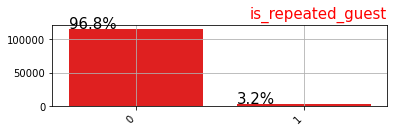

In [20]:
def plot_cat_count_df(cdf: pd.DataFrame, h_count=2):
    """
    Функция для рисования countplot для DataFrame
    """
        
    # количество графиков (столбцов в df)
    cols_len = len(cdf.columns.tolist())

    # сколько графиков в неполной строке
    residue = cols_len%h_count
    
    # количество строк в сетке графиков
    v_count = cols_len//h_count + (1 if residue else 0)

    # создать сетку из графиков размером (v_count, h_count)
    fig, axs = plt.subplots(v_count, h_count, figsize=(20, v_count * 3.5))
    
    # получить цветовую карту с учетом количества графиков
    cmap = plt.get_cmap('hsv', cols_len + 1)

    # для каждого столбца нарисовать график
    for index, column_name in enumerate(cdf):
        # индивидуальный цвет для каждого графика
        plot_color = cmap(index/cols_len)

        # получить оси для текущего графика (в сетке)
        ax = axs[index//h_count][index%h_count]

        # создать countplot
        g = sns.countplot(data=cdf, 
                          x=column_name, 
                          ax=ax, 
                          color=plot_color)
        
        # повернуть подписи категорий на 45 градусов
        g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
        
        # отключить подпись оси x и y
        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_visible(False)
        
        # наименование графика справа цветом графика
        ax.set_title(column_name, 
                     loc='right', 
                     fontsize=15, 
                     color=plot_color)
        
        # включить сетку на графике
        ax.grid()

        # сколько всего записей для всех категорий в колонке
        total = len(cdf[column_name])
        
        print(f"{total} ({column_name})")
        
        # для каждого столбца на графике сверху добавить процент
        for p in ax.patches:
            # вычислить процент, который соответствует текущему столбцу
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            
            # начало (слева) столбца на графике по оси x
            x_pos = p.get_x()
            
            # верх столбца на графике по оси x
            y_pos = p.get_y() + p.get_height()
            
            # добавить процент в качестве аннотации к столбцу
            ax.annotate(percentage, 
                        xy=(x_pos, y_pos), 
                        fontsize=15)

    # расстояние между графиками по горизонтали и вертикали
    fig.subplots_adjust(hspace=1.5, wspace=0.2)

    # если последняя строка в сетке заполнена не до конца
    if residue:
        # удалить все незаполненные графики
        for plot_h_idx in range(h_count-1, residue-1, -1):
            fig.delaxes(axs[v_count-1][plot_h_idx])
            
            
def plot_cat_count_s(cs: pd.Series):
    """
    Функция для рисования countplot для Series
    """
    
    # создать график (сетка 1x1)
    fig, ax = plt.subplots(1, 1, figsize=(6, 1.5))
    
    # получить цветовую карту с учетом количества графиков
    cmap = plt.get_cmap('hsv')
    
    # индивидуальный цвет для каждого графика
    plot_color = cmap(0)

    # создать countplot
    g = sns.countplot(x=cs, 
                      ax=ax, 
                      color=plot_color)

    # повернуть подписи категорий на 45 градусов
    g.set_xticklabels(g.get_xticklabels(), 
                      rotation=45, 
                      horizontalalignment='right')

    # отключить подпись оси x и y
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)

    # наименование графика справа цветом графика
    ax.set_title(cs.name, 
                 loc='right', 
                 fontsize=15, 
                 color=plot_color)

    # включить сетку на графике
    ax.grid()

    # сколько всего записей для всех категорий в колонке
    total = len(cs)
    
    print(f"{total} ({cs.name})")

    # для каждого столбца на графике сверху добавить процент
    for p in ax.patches:
        # вычислить процент, который соответствует текущему столбцу
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)

        # начало (слева) столбца на графике по оси x
        x_pos = p.get_x()

        # верх столбца на графике по оси x
        y_pos = p.get_y() + p.get_height()

        # добавить процент в качестве аннотации к столбцу
        ax.annotate(percentage, 
                    xy=(x_pos, y_pos), 
                    fontsize=15)
        
        
plot_cat_count_s(df.is_repeated_guest) 

## Подготовка данных

- Разделить дата сет на две части:
    - `X` - все колонки кроме `is_repeated_guest`.
    - `y` - только колонка `is_repeated_guest`

**ВНИМАНИЕ:** колонка `is_repeated_guest` не последняя, важно правильно ее "вырезать" (допустим любой работающий способ).

In [23]:
X = df.drop(['is_repeated_guest'], axis='columns')
X

y = df.is_repeated_guest
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_repeated_guest, Length: 119390, dtype: int64

## Oversampling

- Используя класс `RandomOverSampler` из пакета `imbalanced-learn` преобразовать `X` и `y` таким образом, чтобы класс меньшинства получил 75% примеров по сравнению с классом большинства. То есть в результате должно быть примерно такое соотношение: `57.1`/`42.9`.

- Вычислить насколько больше стало записей в датасете после этого преобразования. Какие есть идеи по этому поводу? Много это или мало?

202265 (hotel)
202265 (arrival_date_month)
202265 (meal)
202265 (country)
202265 (market_segment)
202265 (distribution_channel)
202265 (reserved_room_type)
202265 (assigned_room_type)
202265 (deposit_type)
202265 (customer_type)
202265 (reservation_status)
202265 (reservation_status_date)
202265 (is_repeated_guest)


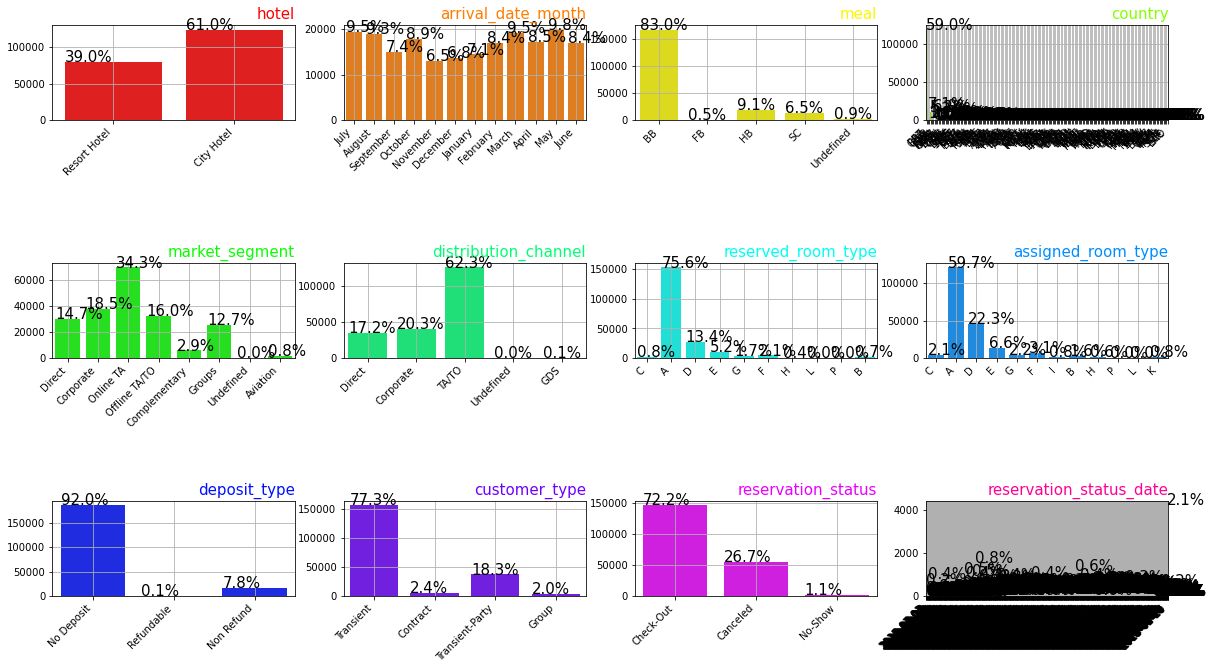

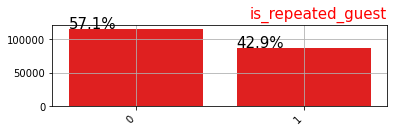

In [25]:
over_sample = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.75)
over_sample

X_over, y_over = over_sample.fit_resample(X, y)

plot_cat_count_df(X_over.select_dtypes(exclude=np.number), h_count=4)

plot_cat_count_s(y_over)

#Стало почти в два раза больше записей... 202265 вместо 119390. Много, но вероятно допустимо. Есть риск переобучения модели.

## Oversampling

- Используя класс `RandomUnderSampler` из пакета `imbalanced-learn` преобразовать `X` и `y` таким образом, чтобы их соотношение стало 50/50.

- Вычислить насколько меньше стало записей в датасете после этого преобразования. Какие есть идеи по этому поводу? Много это или мало?

7620 (hotel)
7620 (arrival_date_month)
7620 (meal)
7620 (country)
7620 (market_segment)
7620 (distribution_channel)
7620 (reserved_room_type)
7620 (assigned_room_type)
7620 (deposit_type)
7620 (customer_type)
7620 (reservation_status)
7620 (reservation_status_date)
7620 (is_repeated_guest)


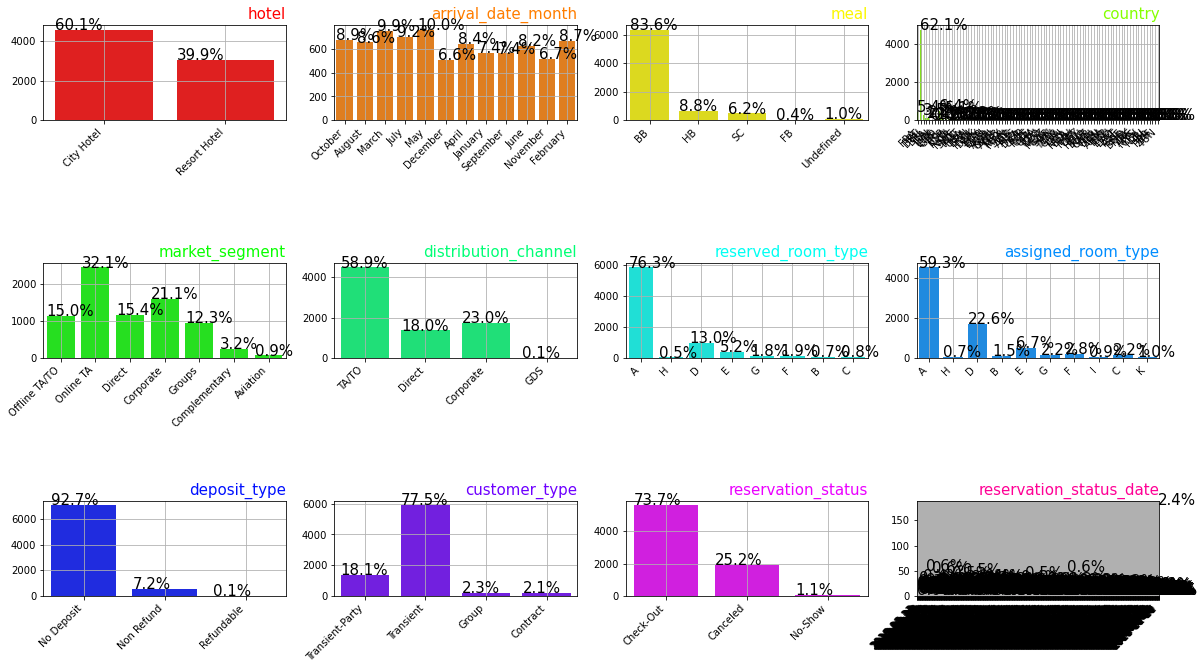

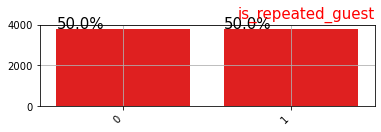

In [27]:
under_sample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1)
under_sample

X_under, y_under = under_sample.fit_resample(X, y)

plot_cat_count_df(X_under.select_dtypes(exclude=np.number), h_count=4)

plot_cat_count_s(y_under)

# Записей стало в 15 раз меньше. Слишком мало для нормального обучения. Однако нужно тестить...